<h1>ejercicios de inteligencia artificial</h1>
<h2>Proyecto 1: Convertir Celsius a fahrenheit</h2>

<p>en este proyecto, construiremos un simple modelo de aprendizaje de amquinas para convertir las temperaturas de Celsius a Fahrenheit</p>

la ecuacion es la sigueente:

<h2>T(F) = T(C) * 9/5 + 32</h2>

por ejemplo, convertamos la temepratura de 0 grados Celsius en Fahrenheit

<h2>T(F) = 0 * 9/5 + 32 = 32</h2>

<p>el obejtivo es predecir el valor de una variable y en base a otra variable x;</p>
<p>x se llama la variable independiente e Y  se llama la variable dependiente</p>
<p>esto se llama "Regresion" y ese tratara con mucho mas detalle en secciones posteriores del curso</p>

In [1]:
import tensorflow  as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
temperature_df = pd.read_csv("data/training.csv")
serie_celsius = temperature_df.Celsius
serie_fahrenheit = temperature_df.Fahrenheit
print(serie_celsius.describe())
print("\n")
print(serie_fahrenheit.describe())

count    16000.000000
mean      1254.736062
std        726.338268
min          0.000000
25%        627.750000
50%       1265.000000
75%       1891.000000
max       2500.000000
Name: Celsius, dtype: float64


count    16000.000000
mean      2290.524913
std       1307.408882
min         32.000000
25%       1161.950000
50%       2309.000000
75%       3435.800000
max       4532.000000
Name: Fahrenheit, dtype: float64


<h2>VISUALIZAR LOS DATOS</h2>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Celsius', ylabel='Fahrenheit'>

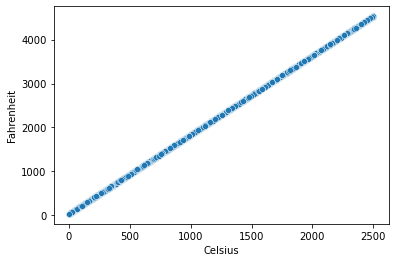

In [3]:
sns.scatterplot(serie_celsius,serie_fahrenheit)

observamos que existe una relacion lineal entre las variables. comprobar

In [4]:
#cargando set de datos
X_train = serie_celsius
Y_train = serie_fahrenheit

In [5]:
#creando el modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape=[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer = tf.keras.optimizers.Adam(1), loss ='mean_squared_error') #copilar

In [7]:
epochts_hist = model.fit(X_train,Y_train,epochs = 100) #interaciones

Epoch 1/100
500/500 [==============================] - 1s 2ms/step - loss: 24130.3438
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 24.8830
Epoch 3/100
500/500 [==============================] - 1s 1ms/step - loss: 1.0644
Epoch 4/100
500/500 [==============================] - 1s 1ms/step - loss: 1.9499
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 4780.9116
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 2.2317
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 4592.6582
Epoch 8/100
500/500 [==============================] - 1s 2ms/step - loss: 1235.9774
Epoch 9/100
500/500 [==============================] - 1s 2ms/step - loss: 2780.6970
Epoch 10/100
500/500 [==============================] - 1s 1ms/step - loss: 9143.5645
Epoch 11/100
500/500 [==============================] - 1s 1ms/step - loss: 0.6519
Epoch 12/100
500/500 [==============================] - 1s 1ms/step - loss: 

500/500 [==============================] - 2s 3ms/step - loss: 0.0099
Epoch 98/100
500/500 [==============================] - 2s 4ms/step - loss: 8.0061e-04
Epoch 99/100
500/500 [==============================] - 1s 3ms/step - loss: 2.9410e-05
Epoch 100/100
500/500 [==============================] - 1s 3ms/step - loss: 1.5565e-06


In [8]:
 epochts_hist.history.keys() # generar claves

dict_keys(['loss'])

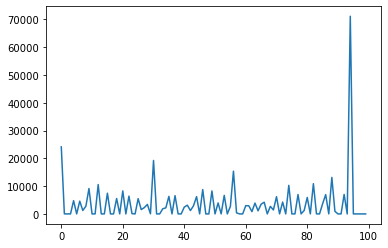

In [9]:
plt.plot(epochts_hist.history['loss']) # visualizar

In [10]:
model.get_weights()

[array([[1.8000001]], dtype=float32), array([31.999819], dtype=float32)]

In [11]:
#predicciones
dat=model.predict(X_train.tolist())
dat
lista = []
for t in dat:
    lista.append(t[0])
    
lista

500/500 [==============================] - 1s 2ms/step


[2136.2,
 2335.9998,
 4316.0,
 2746.4,
 3659.0,
 1720.3999,
 4121.6,
 3563.5999,
 1878.7999,
 2848.9998,
 4112.6,
 865.39984,
 2292.7998,
 3831.7998,
 3581.5999,
 2064.2,
 1661.0,
 845.59985,
 3003.7998,
 49.999817,
 4101.8,
 3189.2,
 4420.4004,
 2474.5999,
 3844.4,
 3448.4,
 987.79987,
 2384.5999,
 4233.2,
 1191.2,
 4496.0,
 4490.6,
 3315.2,
 4258.4004,
 2946.2,
 1014.79987,
 867.1998,
 550.39984,
 2544.7998,
 651.1998,
 3642.7998,
 343.39984,
 2100.2,
 807.79987,
 3390.7998,
 3284.5999,
 4461.8003,
 4366.4004,
 481.99985,
 3425.0,
 1297.3999,
 3461.0,
 3005.5999,
 2726.5999,
 3133.4,
 834.79987,
 3878.5999,
 2389.9998,
 4058.5999,
 4339.4004,
 3729.2,
 697.9998,
 1880.6,
 3714.7998,
 1628.6,
 687.1998,
 1176.7999,
 4148.6,
 1695.2,
 422.59982,
 3299.0,
 156.19983,
 420.79984,
 249.79982,
 2490.7998,
 3983.0,
 3257.5999,
 4134.2,
 2078.5999,
 4089.2,
 802.39984,
 4110.8,
 4224.2,
 4202.6,
 3974.0,
 4512.2,
 2616.7998,
 1272.2,
 523.39984,
 1065.2,
 1416.2,
 3993.7998,
 1304.6,
 4438.4

In [12]:
Tlist = [t*(9/5)+32 for t in X_train.tolist()]
Tlist

[2136.2000000000003,
 2336.0,
 4316.0,
 2746.4,
 3659.0,
 1720.4,
 4121.6,
 3563.6,
 1878.8,
 2849.0,
 4112.6,
 865.4,
 2292.8,
 3831.8,
 3581.6,
 2064.2,
 1661.0,
 845.6,
 3003.8,
 50.0,
 4101.8,
 3189.2000000000003,
 4420.400000000001,
 2474.6,
 3844.4,
 3448.4,
 987.8000000000001,
 2384.6,
 4233.2,
 1191.2,
 4496.0,
 4490.6,
 3315.2000000000003,
 4258.400000000001,
 2946.2000000000003,
 1014.8000000000001,
 867.2,
 550.4,
 2544.8,
 651.2,
 3642.8,
 343.40000000000003,
 2100.2000000000003,
 807.8000000000001,
 3390.8,
 3284.6,
 4461.8,
 4366.400000000001,
 482.0,
 3425.0,
 1297.4,
 3461.0,
 3005.6,
 2726.6,
 3133.4,
 834.8000000000001,
 3878.6,
 2390.0,
 4058.6,
 4339.400000000001,
 3729.2000000000003,
 698.0,
 1880.6000000000001,
 3714.8,
 1628.6000000000001,
 687.2,
 1176.8,
 4148.6,
 1695.2,
 422.6,
 3299.0,
 156.2,
 420.8,
 249.8,
 2490.8,
 3983.0,
 3257.6,
 4134.2,
 2078.6000000000004,
 4089.2000000000003,
 802.4,
 4110.8,
 4224.2,
 4202.6,
 3974.0,
 4512.2,
 2616.8,
 1272.2,
 5

In [15]:
temperature_df["model_value"] = lista
temperature_df["true_value"] = Tlist
temperature_df["error"] = abs(np.array(Tlist) - np.array(lista))
temperature_df

temperature_df["error"].describe()

count    16000.000000
mean         0.000125
std          0.000080
min          0.000000
25%          0.000049
50%          0.000134
75%          0.000177
max          0.000391
Name: error, dtype: float64

In [ ]:
<h2>fin</h2>